In [1]:
import requests
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
exp = re.compile('\D')

In [4]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '861a0bb1df4940b7b945a7d7eb3fdc6c' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [5]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/426/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/322/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/322/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/322'}},
  'code': 'HUL',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/a/a9/Hull_City_AFC.svg',
  'name': 'Hull City FC',
  'shortName': 'Hull',
  'squadMarketValue': '122,250,000 €'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/338/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/338/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/338'}},
  'code': 'LCFC',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/en/6/63/Leicester02.png',
  'name': 'Leicester City FC',
  'shortName': 'Foxes',
  'squadMarketValue': '210,500,000 €'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/340/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/340/

In [6]:
for team in teams:
    cost = team['squadMarketValue']
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    loss = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            loss += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
        else:
            loss += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
    print('Team "{}", {} loss, {} '.format(team['name'], loss, cost))
    team['loss'] = loss

Team "Hull City FC", 50 loss, 122,250,000 € 
Team "Leicester City FC", 52 loss, 210,500,000 € 
Team "Southampton FC", 31 loss, 199,000,000 € 
Team "Watford FC", 43 loss, 128,500,000 € 
Team "Middlesbrough FC", 28 loss, 104,750,000 € 
Team "Stoke City FC", 40 loss, 172,250,000 € 
Team "Everton FC", 27 loss, 239,250,000 € 
Team "Tottenham Hotspur FC", 24 loss, 365,500,000 € 
Team "Crystal Palace FC", 46 loss, 157,750,000 € 
Team "West Bromwich Albion FC", 32 loss, 107,600,000 € 
Team "Burnley FC", 37 loss, 66,500,000 € 
Team "Swansea City FC", 57 loss, 106,100,000 € 
Team "Manchester City FC", 42 loss, 518,000,000 € 
Team "Sunderland AFC", 48 loss, 92,500,000 € 
Team "AFC Bournemouth", 51 loss, 121,750,000 € 
Team "Manchester United FC", 21 loss, 534,250,000 € 
Team "Arsenal FC", 39 loss, 468,500,000 € 
Team "Liverpool FC", 33 loss, 387,200,000 € 
Team "Chelsea FC", 19 loss, 514,800,000 € 
Team "West Ham United FC", 44 loss, 241,500,000 € 


In [7]:
team_for_pd = []
for team in teams:
    team_for_pd.append({'name': team['name'], 'loss': team['loss'], 'cost': int(exp.sub('', team['squadMarketValue']))})
team_for_pd

[{'cost': 122250000, 'loss': 50, 'name': 'Hull City FC'},
 {'cost': 210500000, 'loss': 52, 'name': 'Leicester City FC'},
 {'cost': 199000000, 'loss': 31, 'name': 'Southampton FC'},
 {'cost': 128500000, 'loss': 43, 'name': 'Watford FC'},
 {'cost': 104750000, 'loss': 28, 'name': 'Middlesbrough FC'},
 {'cost': 172250000, 'loss': 40, 'name': 'Stoke City FC'},
 {'cost': 239250000, 'loss': 27, 'name': 'Everton FC'},
 {'cost': 365500000, 'loss': 24, 'name': 'Tottenham Hotspur FC'},
 {'cost': 157750000, 'loss': 46, 'name': 'Crystal Palace FC'},
 {'cost': 107600000, 'loss': 32, 'name': 'West Bromwich Albion FC'},
 {'cost': 66500000, 'loss': 37, 'name': 'Burnley FC'},
 {'cost': 106100000, 'loss': 57, 'name': 'Swansea City FC'},
 {'cost': 518000000, 'loss': 42, 'name': 'Manchester City FC'},
 {'cost': 92500000, 'loss': 48, 'name': 'Sunderland AFC'},
 {'cost': 121750000, 'loss': 51, 'name': 'AFC Bournemouth'},
 {'cost': 534250000, 'loss': 21, 'name': 'Manchester United FC'},
 {'cost': 468500000, '

In [8]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,cost,loss,name
0,122250000,50,Hull City FC
1,210500000,52,Leicester City FC
2,199000000,31,Southampton FC
3,128500000,43,Watford FC
4,104750000,28,Middlesbrough FC
5,172250000,40,Stoke City FC
6,239250000,27,Everton FC
7,365500000,24,Tottenham Hotspur FC
8,157750000,46,Crystal Palace FC
9,107600000,32,West Bromwich Albion FC


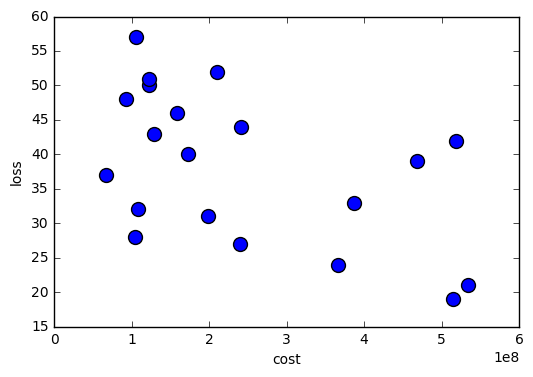

In [9]:
teams_pd.plot.scatter(x='cost', y='loss', s=100)

In [10]:
del teams_pd['name']
teams_pd

,cost,loss
0,122250000,50
1,210500000,52
2,199000000,31
3,128500000,43
4,104750000,28
5,172250000,40
6,239250000,27
7,365500000,24
8,157750000,46
9,107600000,32


In [11]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 0.78211176,  4.66943179],
       [ 1.34670369,  4.85620906],
       [ 1.2731308 ,  2.89504771],
       [ 0.82209703,  4.01571134],
       [ 0.67015302,  2.6148818 ],
       [ 1.10199387,  3.73554543],
       [ 1.5306359 ,  2.52149317],
       [ 2.33833823,  2.24132726],
       [ 1.00922806,  4.29587725],
       [ 0.6883863 ,  2.98843634],
       [ 0.42544321,  3.45537952],
       [ 0.67878984,  5.32315224],
       [ 3.31397867,  3.9223227 ],
       [ 0.59178191,  4.48265452],
       [ 0.77891294,  4.76282042],
       [ 3.41794036,  1.96116135],
       [ 2.99729538,  3.6421568 ],
       [ 2.47716707,  3.08182498],
       [ 3.29350622,  1.77438408],
       [ 1.5450306 ,  4.10909997]])

In [12]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 2.92948037,  3.54876816],
        [ 0.94602849,  3.90898147],
        [ 3.01659493,  1.9922909 ]]),
 array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 1], dtype=int32))

In [13]:
colors_map = {0: 'r', 1: 'g', 2: 'b'}
colors = [colors_map[c] for c in cluster_map]

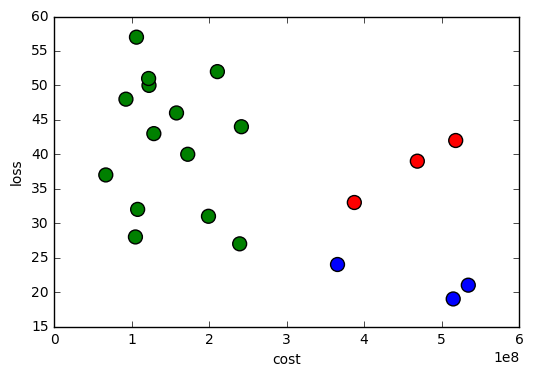

In [14]:
teams_pd.plot.scatter(x='cost', y='loss', c=colors, s=100)

In [15]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 2.88173797,  2.26467442],
        [ 3.15563703,  3.78223975],
        [ 0.83566003,  4.81885361],
        [ 1.04057651,  2.75496476],
        [ 0.98075855,  3.9223227 ]]),
 array([2, 2, 3, 4, 3, 4, 3, 0, 4, 3, 4, 2, 1, 2, 2, 0, 1, 0, 0, 4], dtype=int32))

In [16]:
colors_map = {0: 'c', 1: 'k', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

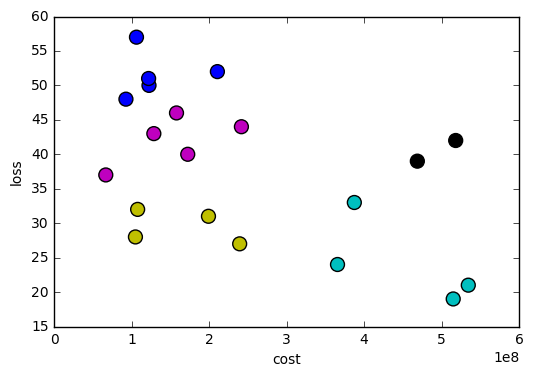

In [17]:
teams_pd.plot.scatter(x='cost', y='loss', c=colors, s=100)